# VGG-16 Transfer learning fot classification

In [2]:
#import libraries
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
#re-size all the images to this
IMAGE_SIZE=[224,224]
#Train data(images) path
train_path='C:/Users/user/AIML/DL handson/cnn_data/train'
#Test data(images) path
valid_path='C:/Users/user/AIML/DL handson/cnn_data/test'

# Add preprocessing layer to the front of VGG-16

In [4]:
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in vgg16_base.layers:
    layer.trainable = False
from tensorflow.keras.applications import VGG19

vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in vgg19_base.layers:
    layer.trainable = False

In [5]:
#Getting number of classes
folders=glob('C:/Users/user/AIML/DL handson/cnn_data/train/*')

In [6]:
folders

['C:/Users/user/AIML/DL handson/cnn_data/train\\cat',
 'C:/Users/user/AIML/DL handson/cnn_data/train\\dog']

In [7]:
len(folders)

2

In [8]:
#Our layers - you can add more layer if you want
x=Flatten()(vgg16_base.output)
#Defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)

# create a model object

In [9]:
model=Model(inputs=vgg16_base.input,outputs=prediction)
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
#Tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [11]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)

#Training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/user/AIML/DL handson/cnn_data/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
print('='*100)

#Testing set
print('Test length:\n')
test_set=test_datagen.flow_from_directory('C:/Users/user/AIML/DL handson/cnn_data/test',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Training length:

Found 700 images belonging to 2 classes.
Test length:

Found 100 images belonging to 2 classes.


# Train the model

In [12]:
r=model.fit(training_set,
            validation_data=test_set,
            epochs=30,
            steps_per_epoch=len(training_set),
            validation_steps=len(test_set))

Epoch 1/30
22/22 [==============================] - 302s 14s/step - loss: 0.5530 - accuracy: 0.7286 - val_loss: 0.3160 - val_accuracy: 0.8400
Epoch 2/30
22/22 [==============================] - 317s 14s/step - loss: 0.2344 - accuracy: 0.9129 - val_loss: 0.2619 - val_accuracy: 0.8800
Epoch 3/30
22/22 [==============================] - 316s 14s/step - loss: 0.1650 - accuracy: 0.9386 - val_loss: 0.3833 - val_accuracy: 0.8300
Epoch 4/30
22/22 [==============================] - 316s 14s/step - loss: 0.1687 - accuracy: 0.9200 - val_loss: 0.2565 - val_accuracy: 0.8800
Epoch 5/30
22/22 [==============================] - 319s 15s/step - loss: 0.1532 - accuracy: 0.9300 - val_loss: 0.2155 - val_accuracy: 0.9200
Epoch 6/30
22/22 [==============================] - 320s 15s/step - loss: 0.1156 - accuracy: 0.9600 - val_loss: 0.2192 - val_accuracy: 0.9000
Epoch 7/30
22/22 [==============================] - 323s 15s/step - loss: 0.0841 - accuracy: 0.9686 - val_loss: 0.2283 - val_accuracy: 0.9000
Epoch 

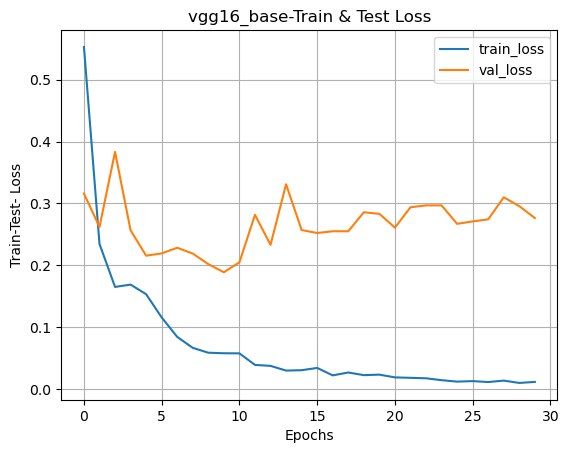

<Figure size 640x480 with 0 Axes>

In [13]:
#loss
plt.title('vgg16_base-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16_base--Loss & Val_loss')

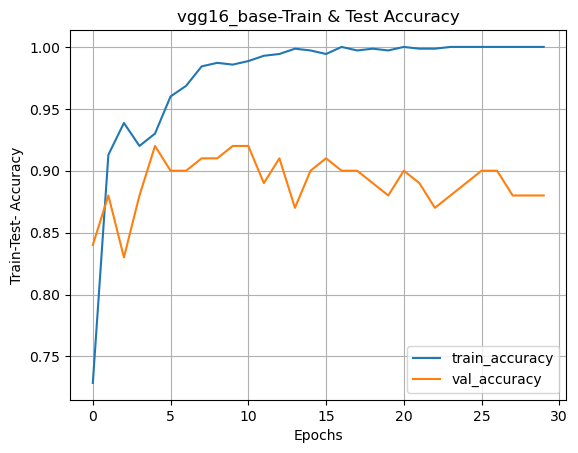

<Figure size 640x480 with 0 Axes>

In [14]:
#Accuracy
plt.title('vgg16_base-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16_base--Accuracy & Val_accuracy')


In [15]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg16_base_dog_cat_classify.h5')

C:\ProgramData\anaconda3-1\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
model.save('vgg16_base_dog_cat_classify.keras')

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['cat','dog']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))


4/4 [==============================] - 30s 7s/step
Confusion Matrix
[[19 31]
 [27 23]]
Classification Report
              precision    recall  f1-score   support

         cat       0.41      0.38      0.40        50
         dog       0.43      0.46      0.44        50

    accuracy                           0.42       100
   macro avg       0.42      0.42      0.42       100
weighted avg       0.42      0.42      0.42       100

Accuracy Score
0.42


<Axes: >

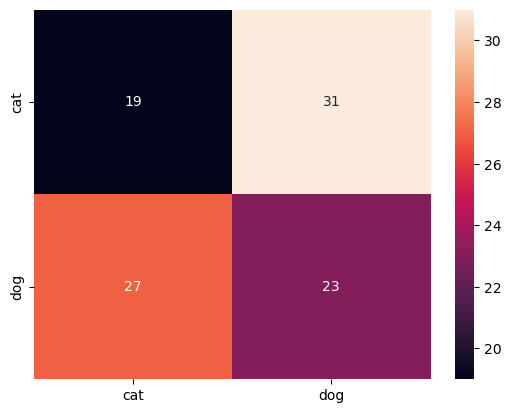

In [20]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['cat','dog'],
            yticklabels=['cat','dog'])